### Student Name: Chelliah Kanthanathan
### Student ID: 18263003

# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import preprocessing

### TASK 1 -  Cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset

In [2]:
df = pd.read_csv("./loans_dataset_et3.csv")
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [3]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (332, 5)


### Scale the Data

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### ScatterPlot function for visualising the clusters

In [5]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### K-means Clustering
#### Number of clusters  𝑘 .

In [6]:
k = 3

In [7]:
# Run k-Means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [8]:
# append the cluster centers to the dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

### multi-dimensional scaling (MDS) technique

In [9]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


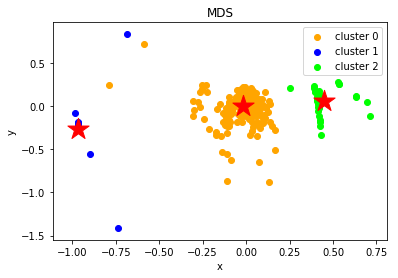

In [10]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### t-SNE technique

In [11]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


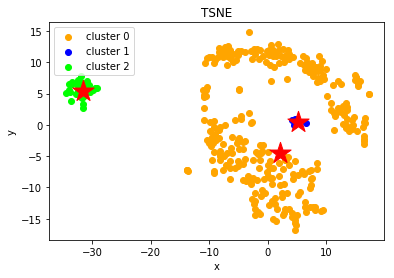

In [12]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Cluster Analysis

In [141]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [142]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,2
1,4917,0.0,130,360,0,2
2,4106,0.0,40,180,1,0
3,3859,3300.0,142,180,1,0
4,6417,0.0,157,180,1,0


In [143]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,1
328,16666,0.0,275,360,1,1
329,10750,0.0,312,360,1,1
330,5955,5625.0,315,360,1,1
331,6133,3906.0,324,360,1,1


In [82]:
# Compute the mean value of each attribute for each cluster
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,5112.803390,1501.383458,141.827119,360.813559,1.0
1,5146.966667,1297.126666,116.333333,161.600000,1.0
2,9153.857143,2098.142857,206.285714,308.571429,0.0


### Conclusion

* Cluster 0 are accounts with highest loan amount term but almost same applicant income and credit history as in Cluster 1
* Cluster 1 are accounts with lowest loan amount and loan amount term and credit history as in Cluster 0
* Cluster 2 are accounts with highest applicant income (including co-appllicant income) and highest loan amount as well. But the credit history is 0

### TASK 2 - Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k

In [144]:
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']]
print(X.shape)

(332, 5)


### ELBOW Criterion Method

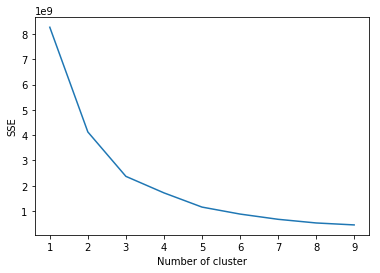

In [145]:
# Calculate sum of squared errors and plot it
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Above plot concludes that the optimal number of clusters is 3 which is used above in Task 1

### Silhouette Coefficient Method:

In [146]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7456684042668981
For n_clusters=3, The Silhouette Coefficient is 0.6142756209757284
For n_clusters=4, The Silhouette Coefficient is 0.4720315599965585
For n_clusters=5, The Silhouette Coefficient is 0.49344393004837944
For n_clusters=6, The Silhouette Coefficient is 0.4284524419814413
For n_clusters=7, The Silhouette Coefficient is 0.4338284495689077
For n_clusters=8, The Silhouette Coefficient is 0.4388989560561801
For n_clusters=9, The Silhouette Coefficient is 0.4360009504118434
For n_clusters=10, The Silhouette Coefficient is 0.43141117930130796


#### Above output concludes that the n_clusters=2 has highest Silhouette Coefficient and the n_clusters=3 has second highest Silhouette Coefficient. But as the dataset has more than 2 features (i.e. five in our case) the optimal no of clusters would be 3

### Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it. 

#### Use DBSCAN to view clusters as areas of high density separated by areas of low density.

In [153]:
# Scale the Data
X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# Tweak the parameters eps and min_samples that indicate how higher the density necessary to form a cluster
db = DBSCAN(eps=0.8, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 100


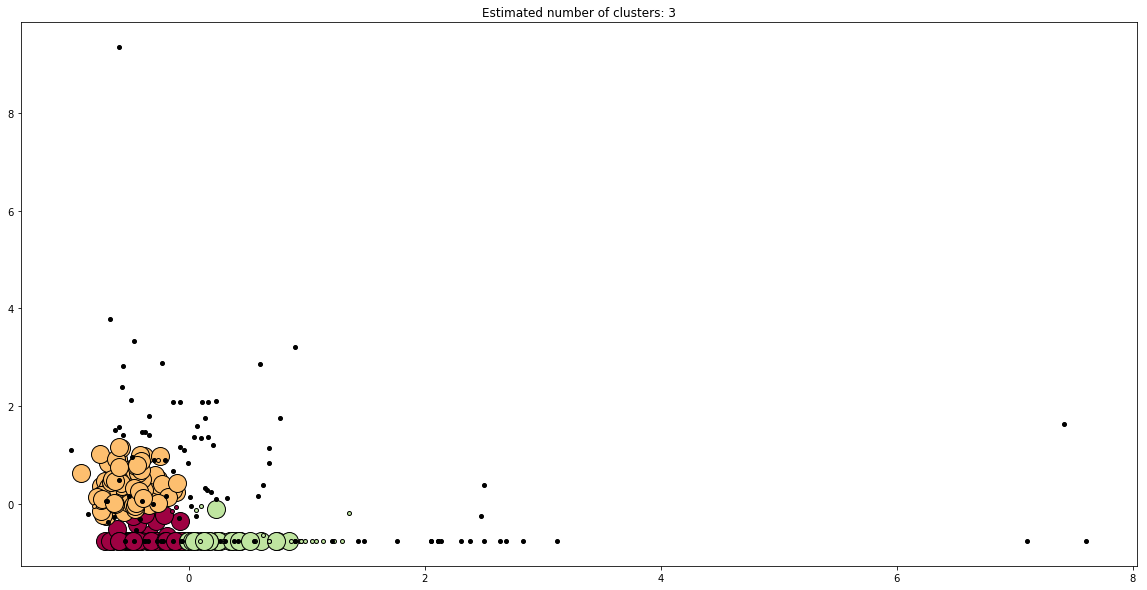

In [148]:
# Plot the clusters
plt.figure(figsize=(20,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=18)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Above plot concludes that the number of cluster is 3 that matches Kmeans which also found it as 3. The black dots in above plot indicate outliers that cannot be in any clusters

### Use LocallyLinearEmbedding that ower-dimensional projection of the data which preserves distances within local neighborhoods.

In [17]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.LocallyLinearEmbedding(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


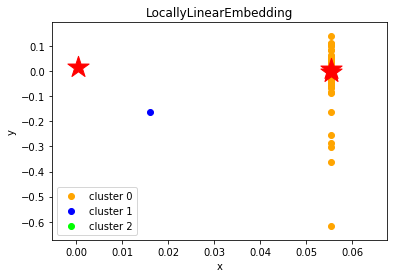

In [18]:
# DBSCAN found the number of clusters as 3.
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='LocallyLinearEmbedding')